# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import warnings

# Constants

In [2]:
DATA_PATH = "../data/res_purchase_card_fiscal_year_2014_3pcd-aiuu.csv"

# Load

In [3]:
df = pd.read_csv(DATA_PATH)
df.head(5)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [4]:
df.shape

(442458, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year-Month                    442458 non-null  int64  
 1   Agency Number                 442458 non-null  int64  
 2   Agency Name                   442458 non-null  object 
 3   Cardholder Last Name          442458 non-null  object 
 4   Cardholder First Initial      442458 non-null  object 
 5   Description                   442458 non-null  object 
 6   Amount                        442458 non-null  float64
 7   Vendor                        442458 non-null  object 
 8   Transaction Date              442458 non-null  object 
 9   Posted Date                   442458 non-null  object 
 10  Merchant Category Code (MCC)  442458 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ MB


In [6]:
df.isnull().mean().round(5)*100

Year-Month                      0.0
Agency Number                   0.0
Agency Name                     0.0
Cardholder Last Name            0.0
Cardholder First Initial        0.0
Description                     0.0
Amount                          0.0
Vendor                          0.0
Transaction Date                0.0
Posted Date                     0.0
Merchant Category Code (MCC)    0.0
dtype: float64

In [7]:
df.describe()

,Year-Month,Agency Number,Amount
count,442458.000000,442458.000000,4.424580e+05
mean,201357.284375,42785.860353,4.249912e+02
std,47.107417,33378.461293,5.266509e+03
min,201307.000000,1000.000000,-4.286304e+04
25%,201309.000000,1000.000000,3.091000e+01
50%,201401.000000,47700.000000,1.048900e+02
75%,201404.000000,76000.000000,3.450000e+02
max,201406.000000,98000.000000,1.903858e+06


There are values in Amount which are negative

In [8]:
df.columns

Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')

### Assuming the transaction with Negative Amount values are refund

In [9]:
df_positive_amt = df[df["Amount"] > 0]
df_positive_amt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427927 entries, 0 to 442457
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Year-Month                    427927 non-null  int64  
 1   Agency Number                 427927 non-null  int64  
 2   Agency Name                   427927 non-null  object 
 3   Cardholder Last Name          427927 non-null  object 
 4   Cardholder First Initial      427927 non-null  object 
 5   Description                   427927 non-null  object 
 6   Amount                        427927 non-null  float64
 7   Vendor                        427927 non-null  object 
 8   Transaction Date              427927 non-null  object 
 9   Posted Date                   427927 non-null  object 
 10  Merchant Category Code (MCC)  427927 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 39.2+ MB


In [10]:
df_positive_amt["cust_card_holder_name"] = df["Cardholder First Initial"].astype(str).str.cat(df["Cardholder Last Name"].astype(str), sep="-")
df_positive_amt.head()

C:\Users\sohai\miniconda3\envs\one_by_zero_submission_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),cust_card_holder_name
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,C-Mason
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,C-Mason
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,J-Massey
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",T-Massey
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",M-Mauro-Herrera


# Model Building

## 1. Cluster cardholders based on frequency of credit card usage and spend and number of unique merchants

#### Applying Elbow Method to pick optimum number of clusters along with Davies Boldin and Silhouette score.

In [11]:
def get_kmeans_model(k):
    return  KMeans(n_clusters=k, random_state=42, init='k-means++', max_iter = 300, n_init = 10)

def get_optimum_cluster_num(scaled_features, min_num_clusters=2, max_num_clusters=10):
    wcss = []
    silhouette = []
    davies_bouldin = []
    calinski_harabasz = []
    
    for k in range(min_num_clusters, max_num_clusters+1):
        kmeans = get_kmeans_model(k)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)
        davies_bouldin.append(davies_bouldin_score(scaled_features, kmeans.labels_))
        silhouette.append(silhouette_score(scaled_features, kmeans.labels_))
        calinski_harabasz.append(calinski_harabasz_score(scaled_features, kmeans.labels_))
    
    fig, axs = plt.subplots(4)
    fig.suptitle('Scores vs Number of Clusters')
    axs[0].plot(range(min_num_clusters, max_num_clusters+1), wcss)
    axs[0].set_ylabel('SSE')
    axs[1].plot(range(min_num_clusters, max_num_clusters+1), silhouette)
    axs[1].set_ylabel('Silhouette')
    axs[2].plot(range(min_num_clusters, max_num_clusters+1), davies_bouldin)
    axs[2].set_ylabel('Davies Bouldin')
    axs[3].plot(range(min_num_clusters, max_num_clusters+1), calinski_harabasz)
    axs[3].set_ylabel('Calinski Harabasz')

In [12]:
def get_stats(df, exclude_cols):
    for col in df.columns:
        if col not in exclude_cols:
            print(f'Mean value of {col}',df[col].mean())
            print(f'Std value of {col}',df[col].std())
            print(f'Min value of {col}',df[col].min())
            print(f'Max value of {col}',df[col].max())
            print("\n")

In [13]:
df_features = df_positive_amt.groupby(['cust_card_holder_name']).agg({'Transaction Date':'count', 'Amount': 'sum', 'Vendor': 'nunique'})
df_features

,Transaction Date,Amount,Vendor
cust_card_holder_name,,,
1-15000,1,4626.46,1
2-24100,9,2819.38,2
4-42000,16,2143.97,2
4-44600,1,111.99,1
4-48000,11,1514.03,2
...,...,...,...
e-Cardholder,1622,17865671.21,269
m-Gotcher,48,36464.59,30
n-Rahnavard,1,410.00,1


In [14]:
df_features.columns = ["usage_freq", "amount_spend", "uniq_merchant"]

In [15]:
get_stats(df_features.copy(), ["card_holder_name"])

Mean value of usage_freq 82.2303996925442
Std value of usage_freq 234.56832687154977
Min value of usage_freq 1
Max value of usage_freq 9650


Mean value of amount_spend 36818.475536126054
Std value of amount_spend 279969.46877264255
Min value of amount_spend 0.04
Max value of amount_spend 17865671.210000012


Mean value of uniq_merchant 31.90641813989239
Std value of uniq_merchant 163.1335706501877
Min value of uniq_merchant 1
Max value of uniq_merchant 7727




### Checking for the outliers

In [16]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
scaled_features

array([[-0.34633067, -0.11499507, -0.18947288],
       [-0.31222219, -0.12145025, -0.18334235],
       [-0.28237727, -0.12386293, -0.18334235],
       ...,
       [-0.34633067, -0.13005695, -0.18947288],
       [ 0.9199466 ,  0.12294727,  0.66880204],
       [-0.20989675, -0.09292226, -0.04847057]])

Q1:-0.34310534482087607
Q3: 0.006671617124454559
IQR: 0.524665442917996
Lower Outlier Threshold: -0.8677707877388721
Upper Outlier Threshold: 0.5313370600424505
Min: -0.40189824742798086
Max: 61.3774126359908
Std: 1.4351808296613138


C:\Users\sohai\miniconda3\envs\one_by_zero_submission_2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

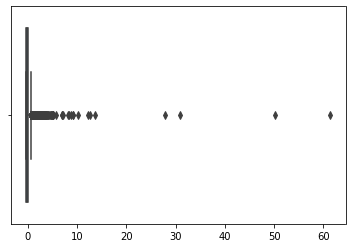

In [17]:
_features_pca_1d = PCA(1).fit_transform(scaled_features)


q75, q25 = np.percentile(_features_pca_1d, [75,25])
iqr = 1.5*(q75-q25)

print(f"Q1:{q25}\nQ3: {q75}\nIQR: {iqr}")
print(f"Lower Outlier Threshold: {q25-iqr}")
print(f"Upper Outlier Threshold: {q75+iqr}")
print(f"Min: {np.min(_features_pca_1d)}\nMax: {np.max(_features_pca_1d)}")
print(f"Std: {np.std(_features_pca_1d)}")
sns.boxplot(
    _features_pca_1d
)

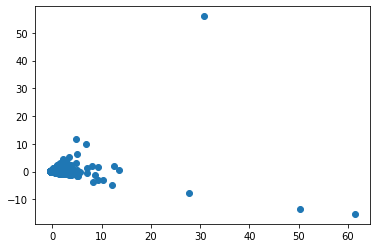

In [18]:
_features_pca_2d = PCA(2).fit_transform(scaled_features)

plt.scatter(_features_pca_2d[:,0], _features_pca_2d[:,1])

### Applying Thresholding for upper limit

(4745, 1)
Q1:-0.34310534482087607
Q3: 0.006671617124454559
IQR: 0.524665442917996
Lower Outlier Threshold: -0.8677707877388721
Upper Outlier Threshold: 0.5313370600424505
Min: -0.40189824742798086
Max: 0.5301465330054509
Std: 0.2143940625909449


C:\Users\sohai\miniconda3\envs\one_by_zero_submission_2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

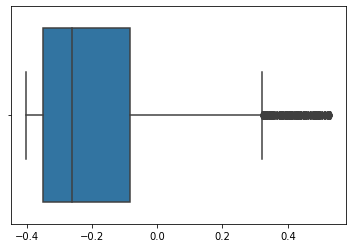

In [19]:
_features_pca_1d_thrshld = _features_pca_1d[(_features_pca_1d < (q75+iqr))[:,0]]
print(_features_pca_1d_thrshld.shape)
print(f"Q1:{q25}\nQ3: {q75}\nIQR: {iqr}")
print(f"Lower Outlier Threshold: {q25-iqr}")
print(f"Upper Outlier Threshold: {q75+iqr}")
print(f"Min: {np.min(_features_pca_1d_thrshld)}\nMax: {np.max(_features_pca_1d_thrshld)}")
print(f"Std: {np.std(_features_pca_1d_thrshld)}")
sns.boxplot(
    _features_pca_1d_thrshld
)

### Plotting Scatterplot to confirm the above finding

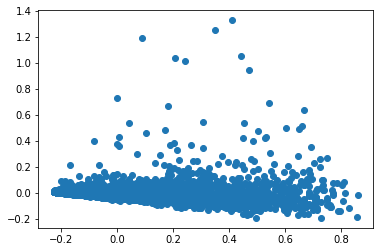

In [20]:
_features_pca_2d = PCA(2).fit_transform(scaled_features[(_features_pca_1d < (q75+iqr))[:,0]])

plt.scatter(_features_pca_2d[:,0], _features_pca_2d[:,1])

### Discarded Approach

In [21]:
# new_scaled_features = scaled_features[(_features_pca_1d < (q75+iqr))[:,0]]
# get_optimum_cluster_num(new_scaled_features, max_num_clusters=11)

### Removing Outliers from the feature Datset and recreating the standard_scaler_model

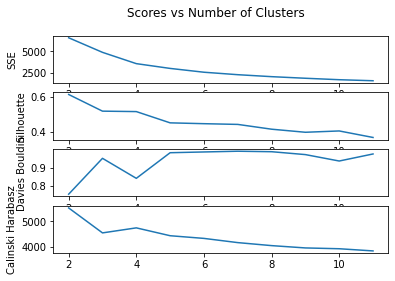

In [22]:
# Trying Now
df_features_new = df_features[(_features_pca_1d < (q75+iqr))[:,0]]
scaler_model = StandardScaler().fit(df_features_new)
new_scaled_features = scaler_model.transform(df_features_new)
get_optimum_cluster_num(new_scaled_features, max_num_clusters=11)

From the above graph plots, 3 is optimum number of clusters than we can consider for our cluster model

In [23]:
kmeans = get_kmeans_model(4)
kmeans.fit(new_scaled_features)
cluster_labels = kmeans.predict(new_scaled_features)

In [24]:
np.unique(cluster_labels)

array([0, 1, 2, 3])

In [25]:
df_features_new.shape

(4745, 3)

In [26]:
# df_features_thrshld = df_features_new[(_features_pca_1d < (q75+iqr))[:,0]]
df_features_new["cluster_id"] = cluster_labels
df_features_new

C:\Users\sohai\miniconda3\envs\one_by_zero_submission_2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,usage_freq,amount_spend,uniq_merchant,cluster_id
cust_card_holder_name,,,,
1-15000,1,4626.46,1,0
2-24100,9,2819.38,2,0
4-42000,16,2143.97,2,0
4-44600,1,111.99,1,0
4-48000,11,1514.03,2,0
...,...,...,...,...
Z-ZHAO,20,6305.86,12,0
Z-Zebarauskaite,16,6001.09,10,0
m-Gotcher,48,36464.59,30,3


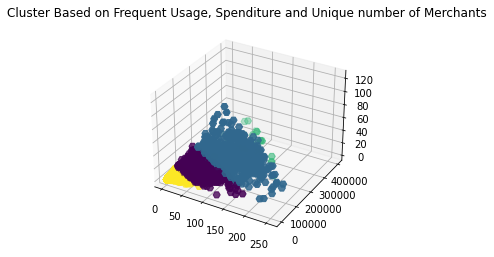

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df_features_new['usage_freq'])
y = np.array(df_features_new['amount_spend'])
z = np.array(df_features_new['uniq_merchant'])

ax.scatter(x,y,z, marker="H", c=df_features_new["cluster_id"], s=50, cmap="viridis_r")
plt.title("Cluster Based on Frequent Usage, Spenditure and Unique number of Merchants")
plt.show()

## Saving Model

In [30]:
import joblib

joblib.dump(kmeans, "../models/kmeans_model.pkl")
_ = joblib.load("../models/kmeans_model.pkl")

joblib.dump(scaler_model, "../models/std_scaler_model.pkl") 
_ = joblib.load("../models/std_scaler_model.pkl")
